### pip install & import

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
#import pandas_profiling
import datetime

In [ ]:
# pip install keras_tuner --upgrade

In [2]:
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import kerastuner as kt

C:\Users\user\AppData\Local\Temp\ipykernel_2812\4175621909.py:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [3]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

# from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_validate

### 최종데이터 불러오기

In [4]:
movie_final = pd.read_csv('../3_merge_top300/movie_final.csv',encoding='utf-8')

## 원핫인코딩 

In [ ]:
# 원핫인코딩

# movie_labels = pd.get_dummies(movie_final,columns = ['국적','장르','등급','계절'])

In [ ]:
# 독립 변수와 종속 변수 나눔

# 독립 = movie_DL[['감독_흥행', '배급사_흥행', '국적_기타', '국적_독일', '국적_미국',
#        '국적_영국', '국적_일본', '국적_중국', '국적_프랑스', '국적_한국', '장르_SF', '장르_가족', '장르_공연',
#        '장르_공포(호러)', '장르_기타', '장르_다큐멘터리', '장르_드라마', '장르_멜로/로맨스', '장르_뮤지컬',
#        '장르_미스터리', '장르_범죄', '장르_사극', '장르_서부극(웨스턴)', '장르_성인물(에로)', '장르_스릴러',
#        '장르_애니메이션', '장르_액션', '장르_어드벤처', '장르_전쟁', '장르_코미디', '장르_판타지',
#        '등급_12세관람가', '등급_15세관람가', '등급_전체관람가', '등급_청소년관람불가', '계절_가을', '계절_겨울',
#        '계절_봄', '계절_여름']] 
# 종속 = movie_DL[['전국 관객수']] 

## 라벨링

In [5]:
from sklearn.preprocessing import LabelEncoder

le_form = LabelEncoder()
le_nation = LabelEncoder()
le_genre = LabelEncoder()
le_rating = LabelEncoder()
le_class = LabelEncoder()
le_season = LabelEncoder()

movie_labels = movie_final.copy()
movie_labels['영화형태'] = le_form.fit_transform(movie_final['영화형태'])
movie_labels['국적'] = le_nation.fit_transform(movie_final['국적'])
movie_labels['장르'] = le_genre.fit_transform(movie_final['장르'])
movie_labels['등급'] = le_rating.fit_transform(movie_final['등급'])
movie_labels['영화구분'] = le_class.fit_transform(movie_final['영화구분'])
movie_labels['계절'] = le_season.fit_transform(movie_final['계절'])
movie_labels.drop(['Unnamed: 0'],axis=1,inplace=True)
movie_labels.head(3)


,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,...,영화구분,연도,월,계절,총 관객수,출연,평점,감독_흥행,배급사_흥행,주연배우_흥행
0,25,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14,2,2,2809,137325939643,10779198,...,1,2022,12,1,112805094,"['시고니 위버', '스티븐 랭', '조 샐다나', '샘 워싱턴', '우나 채플린'...",8.65,0,10,10
1,26,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23,2,2,1843,88582586366,10494499,...,1,2015,4,2,217299523,"['로버트 다우니 주니어', '크리스 헴스워스', '마크 러팔로', '크리스 에반스...",8.32,9,10,76
2,27,기생충,봉준호,씨제이이엔엠,2019-05-30,2,7,1948,87459829095,10313086,...,1,2019,5,2,226678777,"['송강호', '이선균', '조여정', '최우식', '박소담', '이정은', '장혜진']",8.49,10,10,26


### 데이터분배
1) movie_labels_etc : train과 val data   
2) movie_labels_2023 : test data

In [7]:
movie_labels_2023 = movie_labels[movie_labels['연도']==2023]
movie_labels_etc = movie_labels[movie_labels['연도']!=2023]

### 변수 정리   
1. 사용하지 않는 컬럼 제거
2. 독립변수와 종속변수 설정

In [8]:
# 사용하지 않는 컬럼 제거

not_used = ['영화명', '감독', '배급사', '영화형태', '개봉일', '영화구분', '연도', '월']

movie_DL = movie_labels_etc.drop(not_used, axis=1) # 2003~2022 데이터 main
movie_DL2 = movie_labels_2023.drop(not_used, axis=1)# 2023년 test


In [9]:
# 국적 => 국내 vs 해외
# 관객비율.. 2023년 데이터 총 관객수 몰라....
# 비율 말고 총 관객수를 쓰자
# 총관객수 defqult를 2022년으로 해서 2023년 총관객수 채우면 어때?

In [10]:
# 독립 변수와 종속 변수 나눔

독립 = movie_DL[['장르', '등급', '감독_흥행',
               '배급사_흥행', '계절', '전국 스크린수','주연배우_흥행','총 관객수']]
종속 = movie_DL[['전국 관객수']]

In [11]:
# 독립 변수와 종속 변수 나눔

독립_2023 = movie_DL2[['장르', '등급', '감독_흥행',
               '배급사_흥행', '계절', '전국 스크린수','주연배우_흥행','총 관객수']]
종속_2023 = movie_DL2[['전국 관객수']]


In [12]:
종속 = movie_DL[['전국 관객수']].copy()
종속['전국 관객수'] = 종속['전국 관객수'] / 1000
종속_2023 = movie_DL2[['전국 관객수']].copy()
종속_2023['전국 관객수'] = 종속_2023['전국 관객수'] / 1000
독립 = movie_DL[['장르', '등급', '감독_흥행','총 관객수',
               '배급사_흥행','주연배우_흥행','계절', '전국 스크린수']].copy()
독립['총 관객수'] = 독립['총 관객수'] / 1000
독립_2023 = movie_DL2[['장르', '등급', '감독_흥행','총 관객수',
               '배급사_흥행','주연배우_흥행','계절', '전국 스크린수']].copy()
독립_2023['총 관객수'] = 독립_2023['총 관객수'] / 1000

## train, test 데이터 나누기

In [13]:
# train, test 데이터 나눔

from sklearn.model_selection import train_test_split
train_input, test_input, train_target,test_target = train_test_split(독립,종속,test_size=0.25,random_state=42)

## 스케일링... 
...어디서 할까...<br>
라벨링 때문에 바로 스케일링을 따로 해줘야함 (전국스크린수, 전국매출액)

In [16]:
# tunner 이용한 하이퍼 파라미터 찾기
# 해야할 일 : 우리 모델에 맞는 뉴런 수, 활성화 함수 , learning rate, batch_size를 찾아야한다.
class MyHyperModel(kt.HyperModel):
  def build(self, hp):
    # units_1 => 뉴런 개수를 조정하는 부분
    # dropout_1 => dropout 부분을 조정하는 부분
    hp_units1 = hp.Int('units_1', min_value = 16, max_value = 180)
    hp_units2 = hp.Int('units_2', min_value = 16, max_value = 180)
    hp_units4 = hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.05)
    hp_units5 = hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.05)
    # 현재 레이어 층은
    # 입력층 > 히든층 > 출력층으로 되어있다.
    model = keras.Sequential()
    #입력층
    model.add(layers.Dense(hp_units1, activation='swish', input_shape=[9]))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(hp_units4))
    # 히든층
    model.add(layers.Dense(hp_units2, activation='swish'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(hp_units5))
    # 출력층
    model.add(layers.Dense(1, activation='relu'))
    # 1. learning rate 범위 설정
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-6, max_value=1e-3)
    # 2. 옵티마이저 설정
    # Choice를 통해 값을 선택에서 받음
    # hp.int을 쓰면 정수값, hp.Float를 쓰면 소수값, hp.Choice를 쓰면 선택해서
    # Adam
    Adam = optimizers.Adam(learning_rate=hp_learning_rate,beta_1=hp.Choice('beta_1',[.9,.8,.7,.6,.5]),beta_2=hp.Choice('beta_2',[.99,.88,.77,.66,.55]))
    # SGD
    SGD = optimizers.SGD(learning_rate=hp_learning_rate,momentum=hp.Choice('momentum',[.9,.8,.7,.6,.5]))
    # 나머지 추가해야함
    model.compile(optimizer=Adam, loss='mae')
    return model
  # 배치사이즈 설정
  def fit(self, hp, model, *args, **kwargs):
      return model.fit(
          *args,
          batch_size=hp.Int('batch_size', min_value = 16, max_value = 256, step = 16),
          **kwargs,)

In [15]:
tuner = kt.Hyperband(MyHyperModel(),
                    objective = 'loss',
                    max_epochs = 100,
                    executions_per_trial = 3,
                    overwrite = True,
                    factor = 3)
tuner.search(train_input,train_target, epochs = 100, validation_split = 0.1)

Trial 2 Complete [00h 00m 00s]

Best loss So Far: None
Total elapsed time: 00h 00m 01s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
118               |179               |units_1
74                |67                |units_2
0.3               |0.25              |dropout_1
0.4               |0                 |dropout_2
0.00034973        |0.00081197        |learning_rate
0.5               |0.6               |beta_1
0.66              |0.99              |beta_2
0.9               |0.7               |momentum
160               |16                |batch_size
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_tuner\engine\base_tuner.py", line 266, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_tuner\engine\base_tuner.py", line 231, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_tuner\tuners\hyperband.py", line 425, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_tuner\engine\tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_tuner\engine\tuner.py", line 214, in _build_and_fit_

RuntimeError: Number of consecutive failures excceeded the limit of 3.
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_tuner\engine\base_tuner.py", line 266, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_tuner\engine\base_tuner.py", line 231, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_tuner\tuners\hyperband.py", line 425, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_tuner\engine\tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_tuner\engine\tuner.py", line 214, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "C:\Users\user\AppData\Local\Temp\ipykernel_2812\2683944762.py", line 38, in fit
    return model.fit(
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\user\AppData\Local\Temp\__autograph_generated_fileno_z2hcm.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 9), found shape=(None, 8)



# 딥러닝 


In [35]:
# 딥러닝 층 여기가 중요

X = tf.keras.layers.Input(shape=[8])

H = tf.keras.layers.Dense(128)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)

H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)

H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)

H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)

H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)
dropout = tf.keras.layers.Dropout(rate=0.2)(H)

Y = tf.keras.layers.Dense(1)(dropout)
model = tf.keras.models.Model(X,Y)

# 옵티마이저 설정 부분
# Adam = tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.99,beta_2=0.999)
sgd = tf.keras.optimizers.SGD(learning_rate=0.08,momentum=0.6)
# Adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.2, initial_accumulator_value=0.2, epsilon=0.5) #(lr=0.01, epsilon=None, decay=0.1)
model.compile(optimizer=sgd, loss='mae')

# 연도를 뺐을때 바뀌는 값 확인 (target)

In [36]:
# 훈련

model.fit(train_input,train_target,batch_size=100,epochs=100,validation_data=(test_input,test_target))

Epoch 1/100
24/24 [==============================] - 2s 12ms/step - loss: 667.0825 - val_loss: 702.7294
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 639.4078 - val_loss: 997.0323
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 640.4466 - val_loss: 702.0079
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 638.2349 - val_loss: 736.6359
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 641.1548 - val_loss: 696.0779
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 637.1077 - val_loss: 710.0245
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 637.3440 - val_loss: 721.8794
Epoch 8/100
24/24 [==============================] - 0s 5ms/step - loss: 637.8052 - val_loss: 716.7290
Epoch 9/100
24/24 [==============================] - 0s 5ms/step - loss: 637.5976 - val_loss: 698.3561
Epoch 10/100
24/24 [==============================] - 0s 5ms/step - loss

In [28]:
# 훈련할 때 변수에 저장해서 그래프 그려보자!
history = model.fit(train_input,train_target,batch_size=50,epochs=100,validation_data=(test_input,test_target))

Epoch 1/100
47/47 [==============================] - 0s 8ms/step - loss: 354.5170 - val_loss: 399.1142
Epoch 2/100
47/47 [==============================] - 0s 7ms/step - loss: 340.7228 - val_loss: 522.4878
Epoch 3/100
47/47 [==============================] - 0s 8ms/step - loss: 346.1677 - val_loss: 1394.4675
Epoch 4/100
47/47 [==============================] - 0s 7ms/step - loss: 369.0573 - val_loss: 447.3415
Epoch 5/100
47/47 [==============================] - 0s 7ms/step - loss: 339.7458 - val_loss: 1148.8719
Epoch 6/100
47/47 [==============================] - 0s 7ms/step - loss: 338.5992 - val_loss: 610.2410
Epoch 7/100
47/47 [==============================] - 0s 7ms/step - loss: 345.0997 - val_loss: 477.5208
Epoch 8/100
47/47 [==============================] - 0s 8ms/step - loss: 354.0566 - val_loss: 364.8011
Epoch 9/100
47/47 [==============================] - 0s 7ms/step - loss: 340.1493 - val_loss: 338.3317
Epoch 10/100
47/47 [==============================] - 0s 7ms/step - los

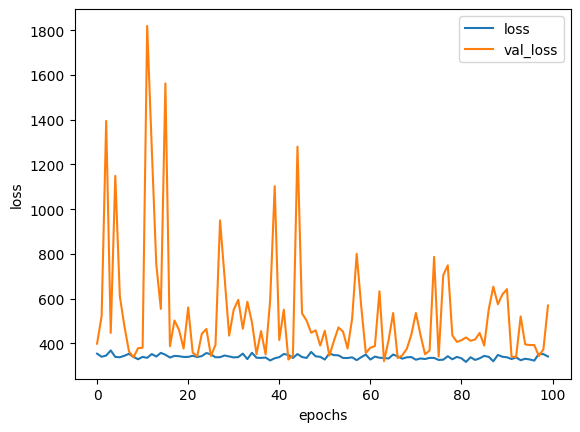

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [30]:
# 확인용도
model.predict(train_input[:5])

1/1 [==============================] - 0s 161ms/step


array([[  65.15129 ],
       [  61.30993 ],
       [  22.939428],
       [2630.2346  ],
       [1450.6974  ]], dtype=float32)

In [31]:
# 여기랑 비슷한지 보기
train_target[:5]

,전국 관객수
2365,31.022
2711,18.241
3041,10.859
544,1125.739
789,618.598


In [32]:
# model.save("osj_test1.h5")

### test data 확인용도

In [24]:
# 확인용도

# 오차율 몇 %로...?
pred = model.predict(독립_2023).round(0)
# 여기랑 비슷한지 보기
종속_2023['pred'] = pred
종속_2023['오차율'] = (abs(종속_2023['전국 관객수'] - 종속_2023['pred'])) / 종속_2023['전국 관객수'] * 100
len(종속_2023.loc[종속_2023['오차율']>20])

1/1 [==============================] - 0s 18ms/step


28

In [25]:
len(종속_2023)

31

In [ ]:
종속_2023[:]